In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("F:\\Datasets\\iris.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
KNN = KNeighborsClassifier(n_neighbors=9)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_train = scaler.fit_transform(x_train)
scaled_test = scaler.transform(x_test)

In [12]:
KNN.fit(scaled_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [13]:
pred_y = KNN.predict(scaled_test)

In [14]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [15]:
accuracy_score(y_test,pred_y)

0.9666666666666667

In [16]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [17]:
print(confusion_matrix(y_test,pred_y))

[[ 9  0  0]
 [ 0 11  1]
 [ 0  0  9]]


In [18]:
error = []
for i  in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

In [19]:
error

[0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7]

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean_Error')

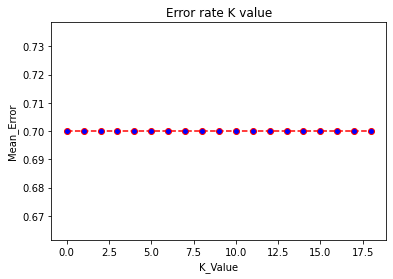

In [21]:
plt.plot(error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=6)
plt.title("Error rate K value")
plt.xlabel("K_Value")
plt.ylabel("Mean_Error")